In [1]:
import pandas as pd ##Data handeler
import numpy as np ##Maths functions
import seaborn as sns ##Graphing
import matplotlib ##Graphing
import matplotlib.pyplot as plt


from scipy.stats import skew
from scipy.stats.stats import pearsonr

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# Import Data Set

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Graphing

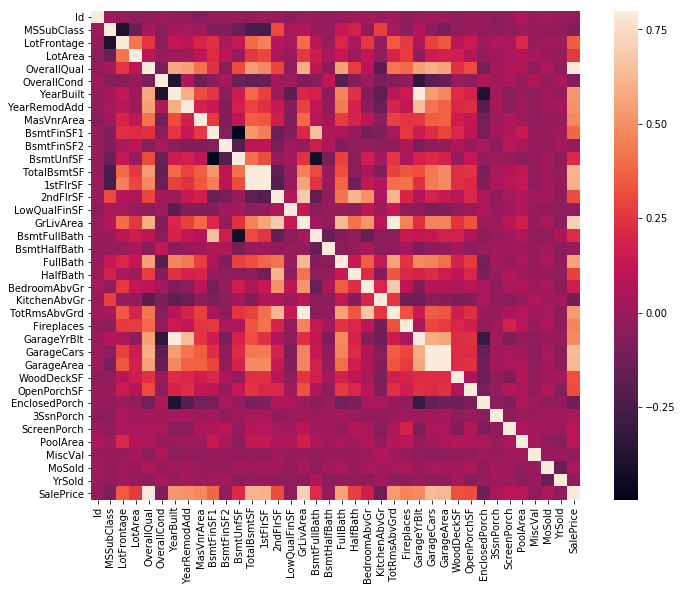

In [3]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

# Select Columns (remove sale price)

In [4]:
data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'], test.loc[:,'MSSubClass':'SaleCondition']))

# Take Log of Sale Price

In [5]:
train["SalePrice"] = np.log1p(train["SalePrice"])

# Create Variable Containing Columns

In [6]:
columns = data.dtypes[data.dtypes != "object"].index

# Removes fields with no data

In [7]:
skewed = train[columns].apply(lambda y: skew(y.dropna()))
data = (pd.get_dummies(data)).fillna(data.mean())

In [8]:
skewed = skewed.index
data[skewed] = np.log1p(data[skewed])

# Put Sampled data into appropriate varaibles

In [9]:
X_train = data[:train.shape[0]]
X_test = data[train.shape[0]:]
y = train["SalePrice"]
list_remove = ["RoofMatl_ClyTile", "MSZoning_C (all)", "GrLivArea"]
X_train.drop(list_remove, axis=1)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.110874,4.189655,9.042040,2.079442,1.791759,7.602900,7.602900,5.283204,6.561031,0.000000,...,0,0,0,1,0,0,0,0,1,0
1,3.044522,4.394449,9.169623,1.945910,2.197225,7.589336,7.589336,0.000000,6.886532,0.000000,...,0,0,0,1,0,0,0,0,1,0
2,4.110874,4.234107,9.328212,2.079442,1.791759,7.601902,7.602401,5.093750,6.188264,0.000000,...,0,0,0,1,0,0,0,0,1,0
3,4.262680,4.110874,9.164401,2.079442,1.791759,7.557995,7.586296,0.000000,5.379897,0.000000,...,0,0,0,1,1,0,0,0,0,0
4,4.110874,4.442651,9.565284,2.197225,1.791759,7.601402,7.601402,5.860786,6.486161,0.000000,...,0,0,0,1,0,0,0,0,1,0
5,3.931826,4.454347,9.555064,1.791759,1.791759,7.597898,7.598900,0.000000,6.597146,0.000000,...,0,0,0,1,0,0,0,0,1,0
6,3.044522,4.330733,9.218804,2.197225,1.791759,7.603399,7.603898,5.231109,7.222566,0.000000,...,0,0,0,1,0,0,0,0,1,0
7,4.110874,4.252854,9.247925,2.079442,1.945910,7.587817,7.587817,5.484797,6.756932,3.496508,...,0,0,0,1,0,0,0,0,1,0
8,3.931826,3.951244,8.719481,2.079442,1.791759,7.566311,7.576097,0.000000,0.000000,0.000000,...,0,0,0,1,1,0,0,0,0,0
9,5.252273,3.931826,8.912069,1.791759,1.945910,7.570443,7.576097,0.000000,6.747587,0.000000,...,0,0,0,1,0,0,0,0,1,0


# Root mean square function


In [10]:
def rmse_cv(model, X_train, y):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

# Lasso model

In [11]:
ml = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]) #tests which method produces the least mean square error
ml.fit(X_train, y) #produces regression line
predict_ml = ml.predict(X_test) #predicts house price
ml_pred = np.expm1(predict_ml) #unlogs all house prices
print(rmse_cv(ml, X_train, y).mean())

0.12448855528319322


# Lasso model coefficents

Text(0.5,1,'Lasso Model')

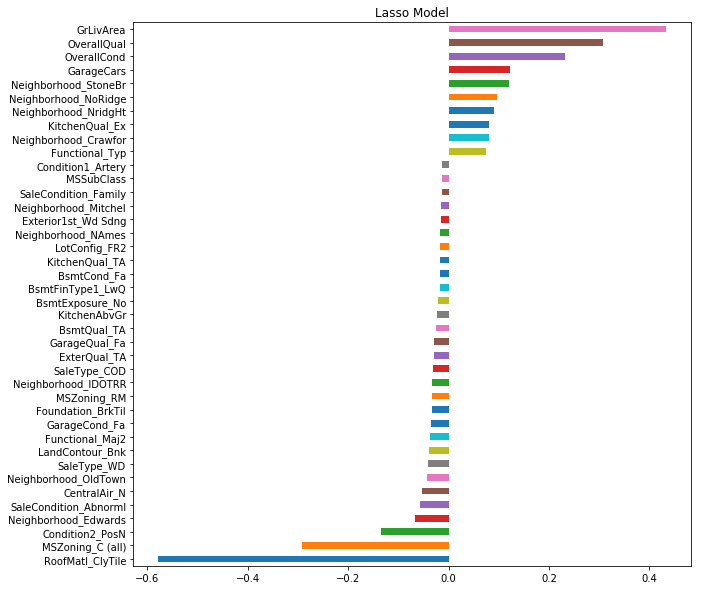

In [12]:
coef = pd.Series(ml.coef_, index = X_train.columns)
coef = pd.concat([coef.sort_values().head(30), coef.sort_values().tail(10)])
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
coef.plot(kind = "barh")
plt.title("Lasso Model")

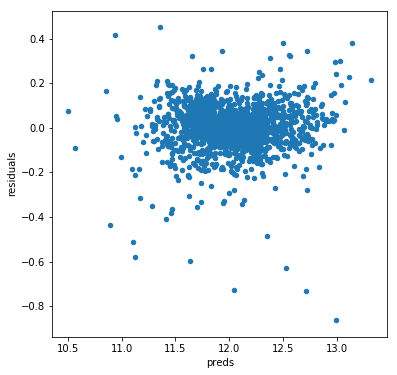

In [13]:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
preds = pd.DataFrame({"preds":ml.predict(X_train), "true":y})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")

# Linear Regression Algorithm

In [14]:
linearRegression = LinearRegression()
linearRegression.fit(X_train, y)
linearRegression.score(X_train, y)

0.9464184973842314

In [15]:
predict_LR = linearRegression.predict(X_test)
li_pred = np.expm1(predict_LR)

# Create Submission File 

In [16]:
Id = []
for i in range(1461, 2920, 1) : Id.append(i)
submission = pd.DataFrame({'ID': Id, 'SalePrice': ml_pred})
submission.to_csv('submission.csv', index=False)